In [1]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load the dataset
data = pd.read_csv('C:/Users/1234/Downloads/Company_Data.csv')

In [3]:
# Display basic information about the dataset
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    object 
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    object 
 10  US           400 non-null    object 
dtypes: float64(1), int64(7), object(3)
memory usage: 34.5+ KB
None


In [4]:
# Display summary statistics
print(data.describe())

            Sales   CompPrice      Income  Advertising  Population  \
count  400.000000  400.000000  400.000000   400.000000  400.000000   
mean     7.496325  124.975000   68.657500     6.635000  264.840000   
std      2.824115   15.334512   27.986037     6.650364  147.376436   
min      0.000000   77.000000   21.000000     0.000000   10.000000   
25%      5.390000  115.000000   42.750000     0.000000  139.000000   
50%      7.490000  125.000000   69.000000     5.000000  272.000000   
75%      9.320000  135.000000   91.000000    12.000000  398.500000   
max     16.270000  175.000000  120.000000    29.000000  509.000000   

            Price         Age   Education  
count  400.000000  400.000000  400.000000  
mean   115.795000   53.322500   13.900000  
std     23.676664   16.200297    2.620528  
min     24.000000   25.000000   10.000000  
25%    100.000000   39.750000   12.000000  
50%    117.000000   54.500000   14.000000  
75%    131.000000   66.000000   16.000000  
max    191.000000

In [5]:
# Check for missing values
print(data.isnull().sum())

Sales          0
CompPrice      0
Income         0
Advertising    0
Population     0
Price          0
ShelveLoc      0
Age            0
Education      0
Urban          0
US             0
dtype: int64


In [15]:
# Convert 'Sales' to a categorical variable
# You can define your own criteria to categorize sales into high, medium, and low
data['Sales_Category'] = pd.qcut(data['Sales'], q=[0, 0.33, 0.66, 1], labels=['Low', 'Medium', 'High'])

# Drop the original 'Sales' column
data.drop('Sales', axis=1, inplace=True)

# Check the updated dataset
print(data.head())


   CompPrice  Income  Advertising  Population  Price ShelveLoc  Age  \
0        138      73           11         276    120       Bad   42   
1        111      48           16         260     83      Good   65   
2        113      35           10         269     80    Medium   59   
3        117     100            4         466     97    Medium   55   
4        141      64            3         340    128       Bad   38   

   Education Urban   US Sales_Category  
0         17   Yes  Yes           High  
1         10   Yes  Yes           High  
2         12   Yes  Yes           High  
3         14   Yes  Yes         Medium  
4         13   Yes   No            Low  


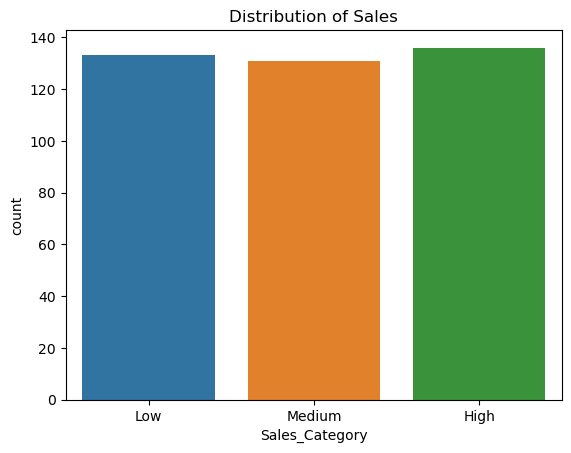

In [17]:
# Visualize the distribution of the target variable 'Sales'
sns.countplot(x='Sales_Category', data=data)
plt.title('Distribution of Sales')
plt.show()

In [8]:
# The countplot of the target variable 'Sales' suggests that there is a balance in the distribution, with one or more categories having significantly higher or lower occurrences compared to others.

C:\Users\1234\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


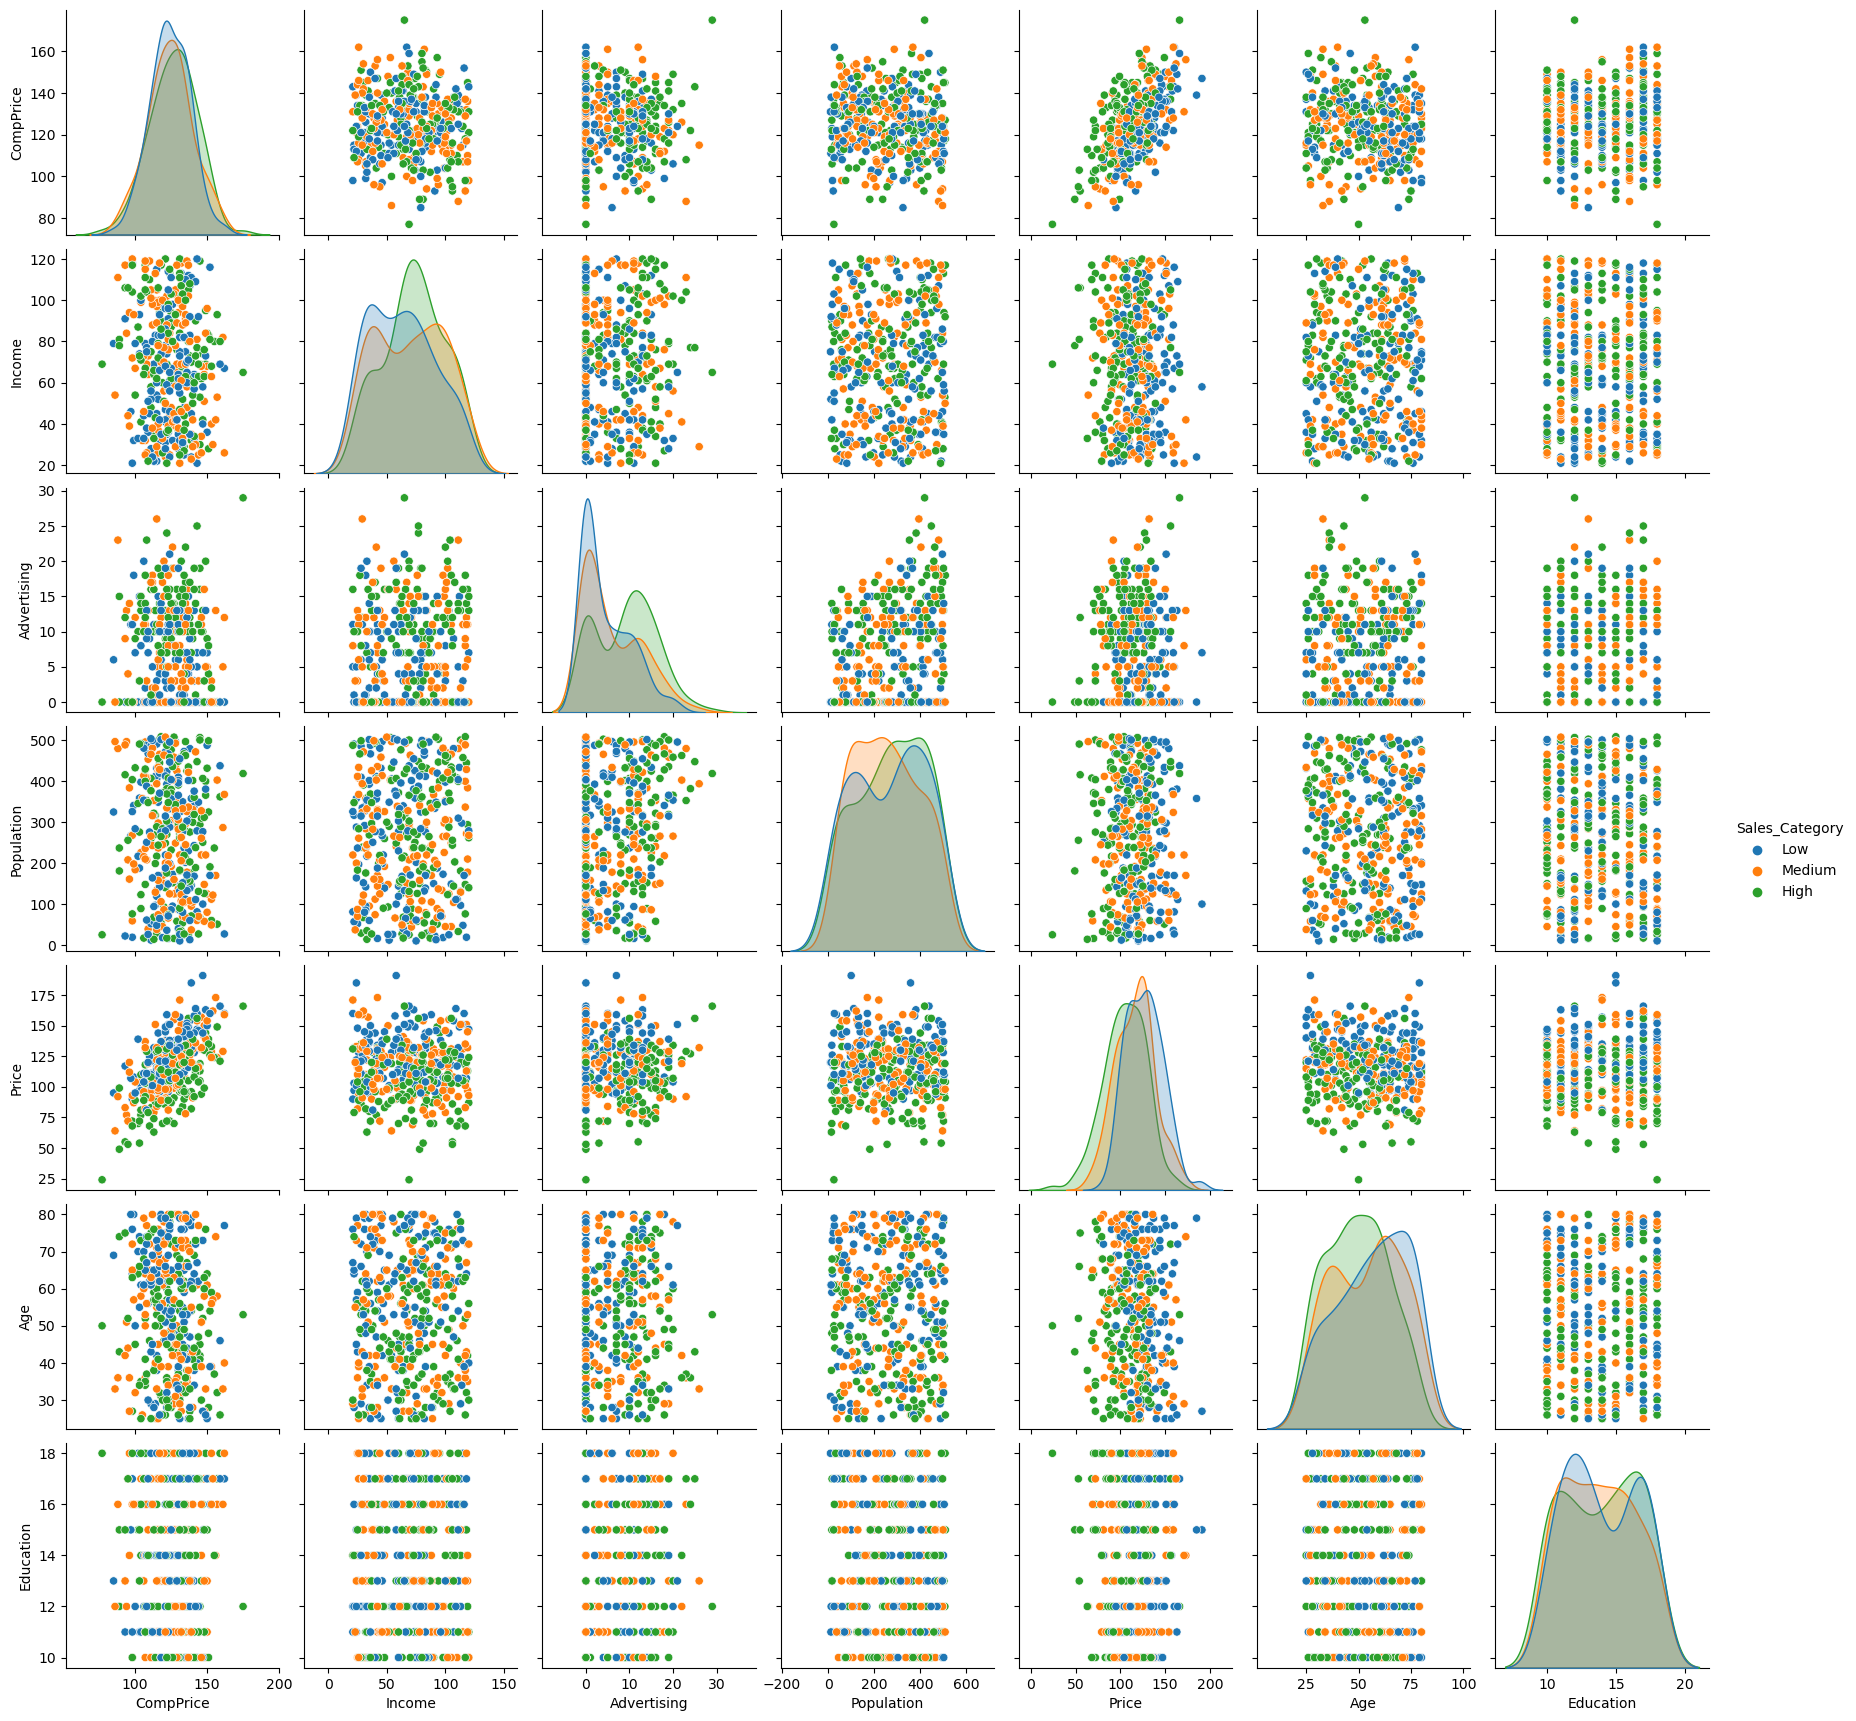

In [19]:
# Explore the relationship between numerical variables and 'Sales'
sns.pairplot(data, hue='Sales_Category')
plt.show()

In [10]:
# The pairplot visualization suggests that there is no clear linear separation between numerical variables, indicating that a simple linear model may not be sufficient for predicting the 'Sales' categories.

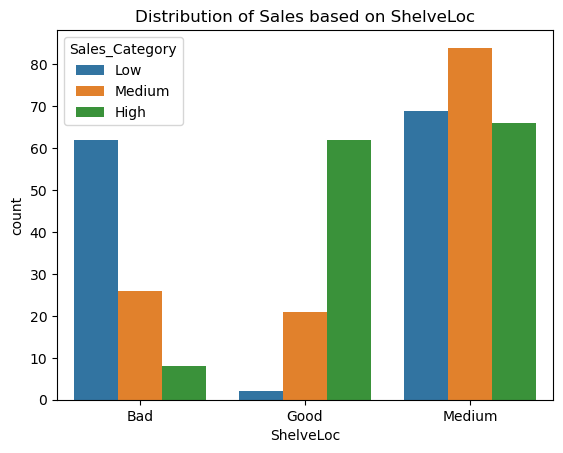

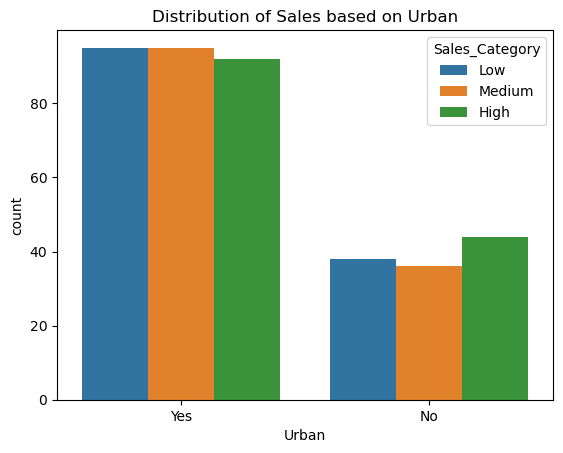

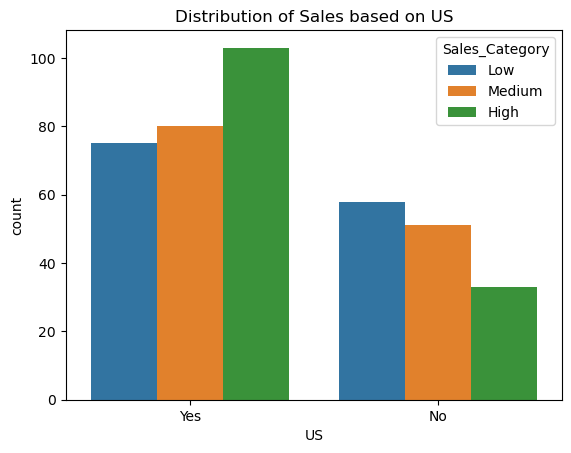

In [23]:
# Explore the impact of categorical variables on 'Sales'
categorical_variable = ['ShelveLoc','Urban','US']
for variable in categorical_variable:
    sns.countplot(x=variable, hue='Sales_Category', data=data)
    plt.title(f'Distribution of Sales based on {variable}')
    plt.show()

In [25]:
# The visualization of the impact of categorical variables on 'Sales_Category' suggests that products placed on 'Medium' shelves, sold in urban areas, and sold in the US tend to have higher sales compared to other categories.

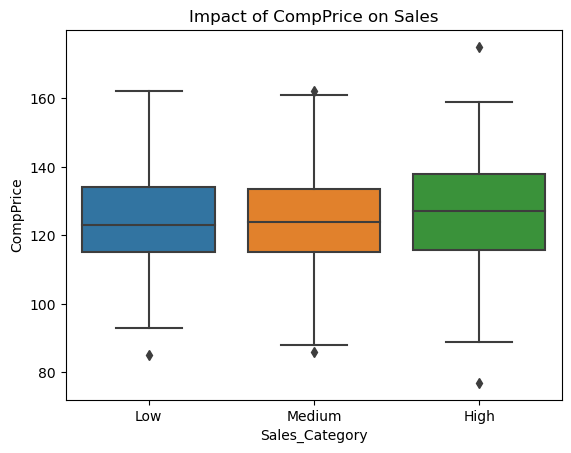

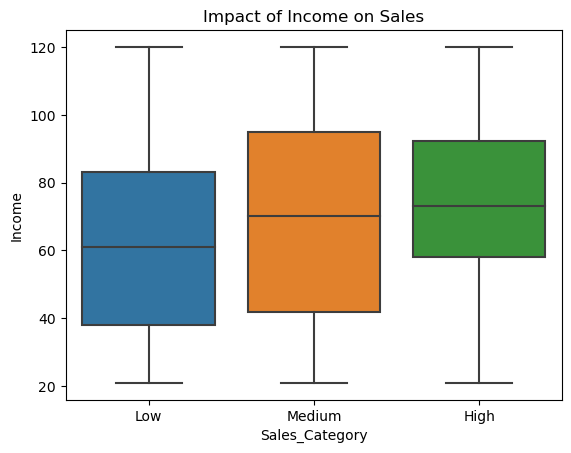

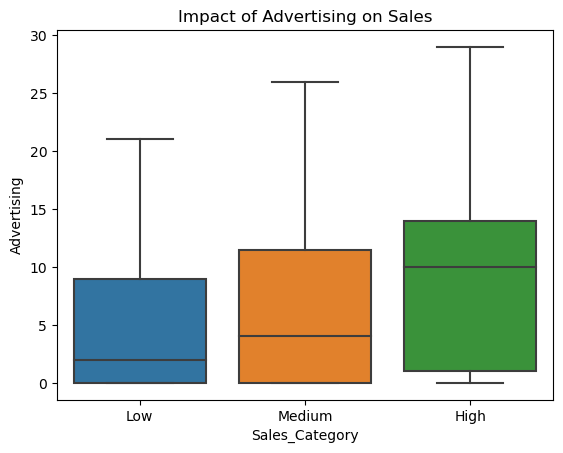

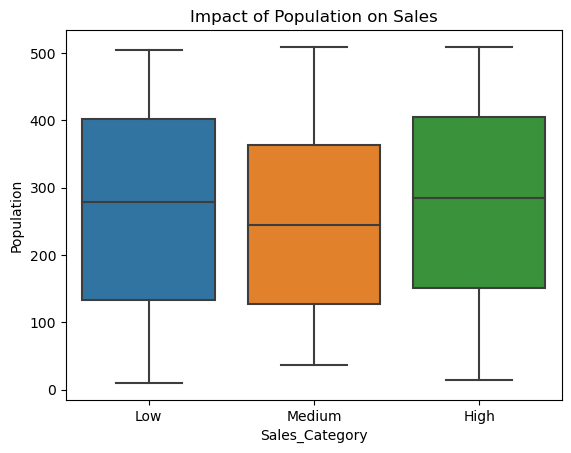

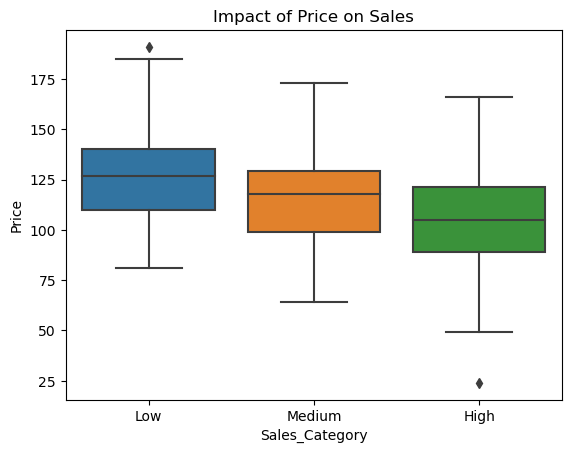

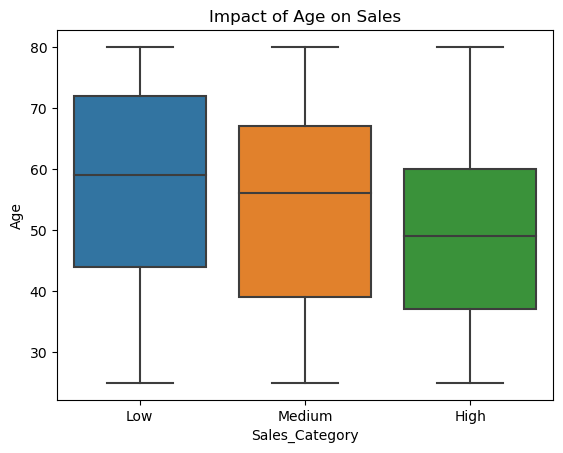

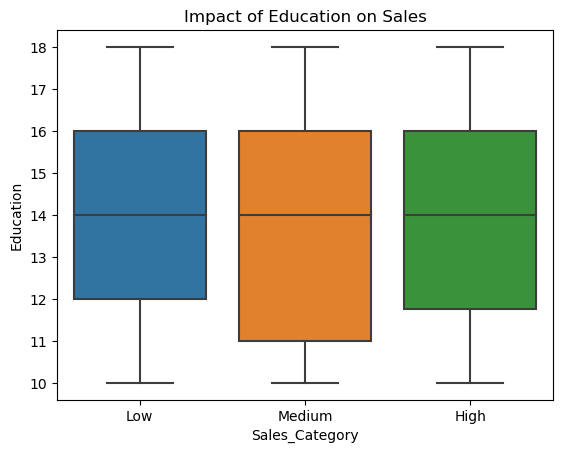

In [22]:
# Explore the impact of numerical variables on 'Sales'
numerical_variables = ['CompPrice', 'Income', 'Advertising', 'Population', 'Price', 'Age', 'Education']
for variable in numerical_variables:
    sns.boxplot(x='Sales_Category', y=variable, data=data)
    plt.title(f'Impact of {variable} on Sales')
    plt.show()

In [24]:
# The boxplots show the impact of numerical variables on sales categories, indicating that medium levels of income, high level of advertising, and low level of price are associated with higher sales, while higher education levels and older age are associated with lower sales.